In [ ]:
# José G. Portela

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics
# from scipy.stats import ttest_ind
# from matplotlib.ticker import FuncFormatter
# from matplotlib.ticker import ScalarFormatter

In [3]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\IronHack\\Labs\\Week 5\\amz_uk_price_prediction_dataset.csv")
df.head()
# 2443651 rows × 9 columns

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


# Understanding Product Categories

In [8]:
# Frequency Tables:
frequency_table = df['category'].value_counts().sort_index()

print("Top 5 most listed product categories:")
print(frequency_table.head(5))

Top 5 most listed product categories:
3D Printers                       248
3D Printing & Scanning           4067
Abrasive & Finishing Products     250
Action Cameras                   1697
Adapters                          254
Name: category, dtype: int64


Bar chart highlights '3D Printing & Scanning' category dominance in the listings


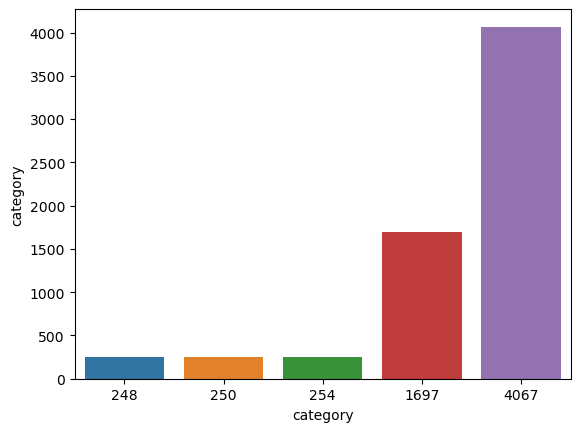

In [17]:
#Vizualizations:
sns.barplot(y=frequency_table.head(5),x=frequency_table.head(5))
print("Bar chart highlights '3D Printing & Scanning' category dominance in the listings")

# Delving into Product Pricing

In [19]:
# Measures of Centrality
mean_value = df['price'].mean()
median_value = df['price'].median()
mode_value = df['price'].mode()[0]

print("\nMean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

# Measures of Dispersion
variance_value = df['price'].var()
std_deviation_value = df['price'].std()
InterQuantileRange = df['price'].quantile(0.75)-df['price'].quantile(0.25)
upper_whisker = 1.5*InterQuantileRange+df['price'].quantile(0.75)
lower_whisker = -1.5*InterQuantileRange+df['price'].quantile(0.25)

print("Variance:", variance_value)
print("Standard Deviation:", std_deviation_value)
print("Inter quantile range:",upper_whisker,lower_whisker)


Mean: 89.24380943985244
Median: 19.09
Mode: 9.99
Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Inter quantile range: 99.99000000000001 -44.01


In [ ]:
""" 
We got that the average price point is of 89.24, suggesting 
there are high listed price influencing the mean when comparing
whit the mode of 9.99

"""

<AxesSubplot:ylabel='Count'>

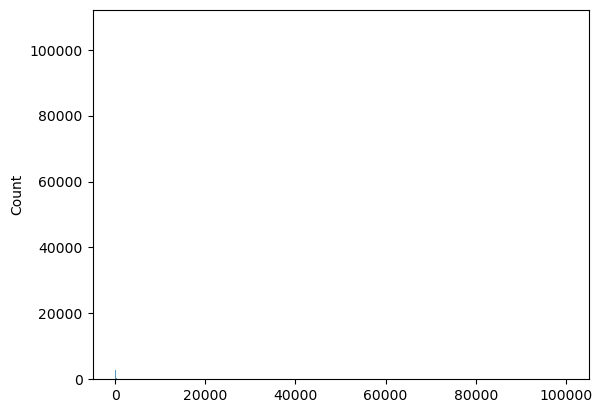

In [31]:
# Visualizations:
df_price_int = [int(x) for x in df['price']]
sns.histplot(df_price_int, bins=range(min(df_price_int),max(df_price_int)+1),kde=False)

<AxesSubplot:>

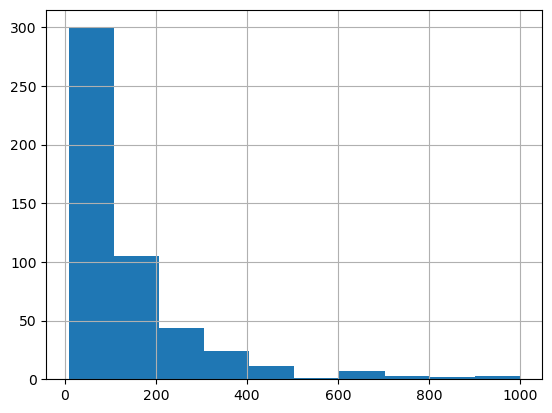

In [43]:
df['price'].head(500).hist()

<AxesSubplot:>

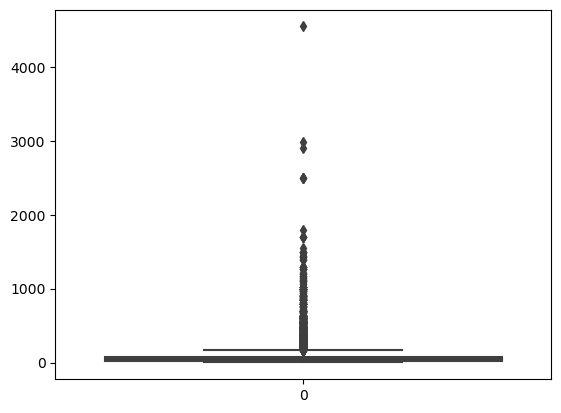

In [46]:
sns.boxplot(data=df['price'].head(10000))

# Unpacking Product Ratings

In [49]:
# Measures of Centrality
mean_value = df['stars'].mean()
median_value = df['stars'].median()
mode_value = df['stars'].mode()[0]

print("\nMean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

# Measures of Dispersion
variance_value = df['stars'].var()
std_deviation_value = df['stars'].std()
InterQuantileRange = df['stars'].quantile(0.75)-df['stars'].quantile(0.25)
upper_whisker = 1.5*InterQuantileRange+df['stars'].quantile(0.75)
lower_whisker = -1.5*InterQuantileRange+df['stars'].quantile(0.25)

print("Variance:", variance_value)
print("Standard Deviation:", std_deviation_value)
print("Inter quantile range:",upper_whisker,lower_whisker)


Mean: 2.152836472966905
Median: 0.0
Mode: 0.0
Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Inter quantile range: 11.0 -6.6000000000000005


In [53]:
# Shape of distribution
# Skewness and Kurtosis for the stars (rating) column.

skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

print("Skewness for the stars (rating) column:",skewness_stars)
print("Kurtosis for the stars (rating) column:", kurtosis_stars)

Skewness for the stars (rating) column: 0.08120735761080985
Kurtosis for the stars (rating) column: -1.9260061280432985


In [8]:
df['stars'].head()

0    4.7
1    4.7
2    4.7
3    4.7
4    4.6
Name: stars, dtype: float64

<AxesSubplot:>

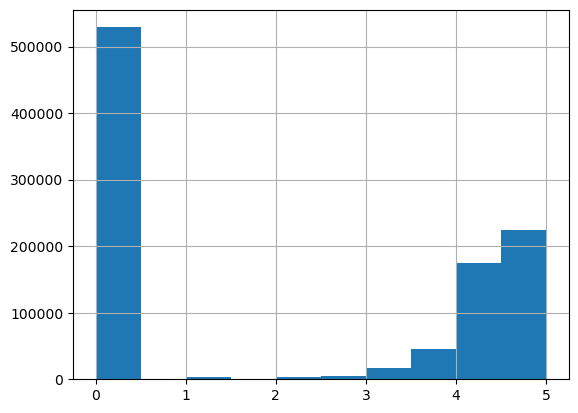

In [7]:
df['stars'].head(1000000).hist()